# Submarine Mission Control Simulation

This notebook demonstrates the performance of a PD controller for an underwater submarine mission. We'll:
1. Configure the Python environment
2. Load a mission from CSV data
3. Create and configure the PD controller
4. Run a simulation with random disturbances
5. Visualize and analyze the results

In [44]:
# Step 1: Configure Python path to find uuv_mission module
import os
import sys

# Add the project root directory to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

if project_root not in sys.path:
    sys.path.insert(0, project_root)
    
print(f"✓ Added {project_root} to Python path")

✓ Added c:\Users\tommb\OneDrive\Documents\Uni\Y3\B1\Coding Practical 1\b1-coding-practical-mt24 to Python path


In [45]:
# Step 2: Import required libraries and modules
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Import our project modules
try:
    from uuv_mission.dynamic import Submarine, ClosedLoop, Mission
    from uuv_mission.control import Controller
    print("✓ Successfully imported uuv_mission modules")
except ImportError as e:
    print(f"✗ Error importing uuv_mission modules: {e}")

✓ Successfully imported uuv_mission modules


In [46]:
# Step 3: Set up the path to mission.csv and verify it exists
data_dir = os.path.join(project_root, 'data')
mission_file = os.path.join(data_dir, 'mission.csv')

# Verify the file exists
if os.path.exists(mission_file):
    print(f"✓ Found mission file at: {mission_file}")
    MISSION_FILE_PATH = mission_file
else:
    print(f"✗ Error: Could not find mission file at: {mission_file}")
    MISSION_FILE_PATH = None

✓ Found mission file at: c:\Users\tommb\OneDrive\Documents\Uni\Y3\B1\Coding Practical 1\b1-coding-practical-mt24\data\mission.csv


## Create Mission and Controller

Let's create a submarine instance, configure a PD controller with appropriate gains, and load the mission from our CSV file.

In [47]:
# Step 4: Create submarine, controller, and load mission
# Create submarine instance
sub = Submarine()
print("✓ Created Submarine instance")

# Create PD controller with tuned gains
controller = Controller(kp=0.15, kd=0.7)
print(f"✓ Created PD Controller with kp={controller.kp}, kd={controller.kd}")

# Create closed-loop system
closed_loop = ClosedLoop(sub, controller)
print("✓ Created ClosedLoop system")

# Load mission from CSV file
if MISSION_FILE_PATH:
    mission = Mission.from_csv(MISSION_FILE_PATH)
    print(f"✓ Loaded mission with {len(mission.reference)} waypoints")
else:
    print("✗ Cannot load mission - file path not found")

✓ Created Submarine instance
✓ Created PD Controller with kp=0.15, kd=0.7
✓ Created ClosedLoop system
✓ Loaded mission with 100 waypoints


## Run Simulation with Random Disturbances

Now we'll simulate the mission with random disturbances to test the controller's robustness.

In [48]:
# Step 5: Run simulation with random disturbances
# Use a moderate disturbance variance of 0.5
print("Running simulation...")
trajectory = closed_loop.simulate_with_random_disturbances(mission, variance=0.5)
print(f"✓ Simulation complete - generated trajectory with {len(trajectory.position)} points")

Running simulation...
✓ Simulation complete - generated trajectory with 100 points


## Visualize Results

Let's plot the completed mission to see how well the controller performed in following the reference trajectory while avoiding the cave boundaries.

Plotting mission trajectory...


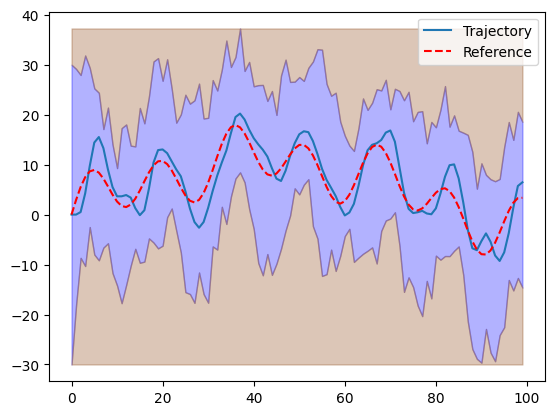

✓ Plot displayed


In [49]:
# Step 6: Visualize the mission results
print("Plotting mission trajectory...")
trajectory.plot_completed_mission(mission)
print("✓ Plot displayed")